### Medical Insurance Prediction

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances.

This dataset contains input features such as age, bmi, sex, no of dependents,smoker,region and target variable as charges, based on input features we predict charges, since this target is continous data we consider this as regression problem.

In [5]:
df = pd.read_csv('https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
#print head of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#print tail of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
#shape of the dataset
df.shape

(1338, 7)

We have 1338 rows and 7 columns in this dataset. we have categorical and numerical values in the dataset and our target column is a numerical column so we consider as regression problem.

1. categorical features are: sex, children, smoker, region.
2. numerical features: age, bmi.
3. target variable: charges.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we observe that we have 1338 rows and 7 columns, no null values, so no need to treat missing values, but we have object datatype values or categorical values which need to be encoded.


In [13]:
#check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [15]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Data Visualization

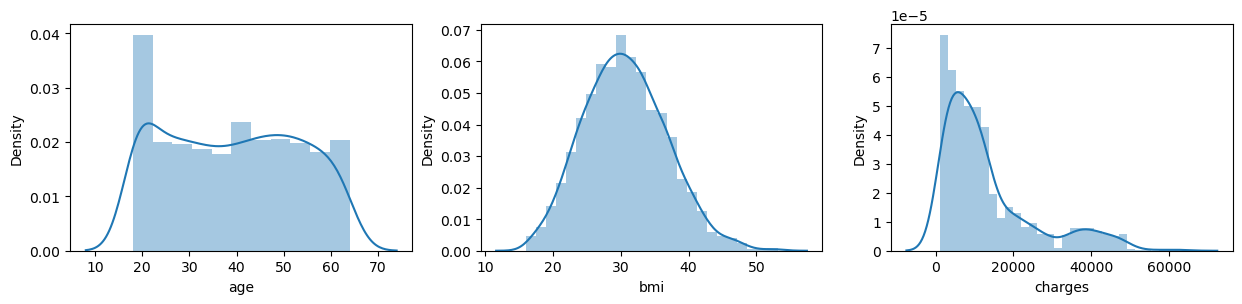

In [16]:
#visualize the data of each column
fig = plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.distplot(df['age'])

plt.subplot(3,3,2)
sns.distplot(df['bmi'])


plt.subplot(3,3,3)
sns.distplot(df['charges'])

plt.show()


We observe that 
1. There are many people aged 20 to 25 and less people around 35 to 40 and we see there is a bidominal    and normal distribution in this feature.
2. There is a normal distribution in bmi , there are more number of people having higher bmi value        than the normal value(18.5-25), and also we observe there is slight right skewness.
3. our target column chargeshas very huge data from 10000 and very less dat in 30 t0 35000 dollars and    skewed after approximately 50000 dollars 



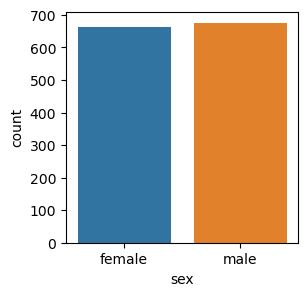

male      676
female    662
Name: sex, dtype: int64


In [17]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'sex', data=df)
plt.show()

print(df['sex'].value_counts())

There is almost equal distribution for both classes.

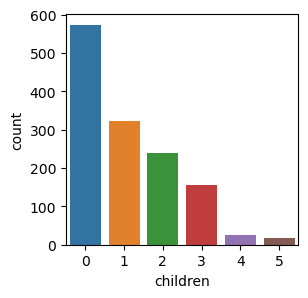

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [18]:
#visualization for children column
plt.figure(figsize=(3,3))
sns.countplot(x = 'children', data=df)
plt.show()

print(df['children'].value_counts())

We observe there are many people who are not having children, and less people have 4 to 5 childrens, majority of the data is people without childrens and one child.

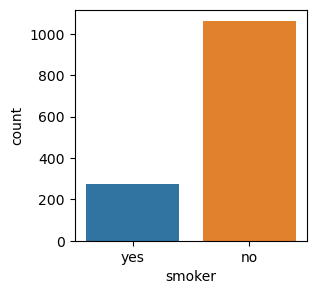

no     1064
yes     274
Name: smoker, dtype: int64


In [19]:
#visualization for smoker column
plt.figure(figsize=(3,3))
sns.countplot(x = 'smoker', data=df)
plt.show()

print(df['smoker'].value_counts())

we observe that this dataset has huge number of non smokers compared to smokers.

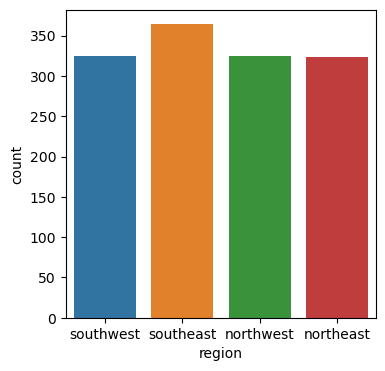

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [20]:
#visualization for region column
plt.figure(figsize=(4,4))
sns.countplot(x = 'region', data=df)
plt.show()

print(df['region'].value_counts())

we observe that there is no  much difference in region which people belongs too, it has almost equal distribution in all regions except southeast it has bit more people compared to other regions.

In [21]:
# we will check for the statistical data of our dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


we see 
1. there are no null values since all columns have same count.
2. std deviation is less in all the columns compared to mean values except children column.
3. mean value and median value are almost equal in all the columns except the target columns, so there is no such huge skewness.
4. there may be some outliers in bmi as  the max value is higher comparitively.

In [22]:
#replacinging object data to int data
df.replace({'sex':{'male':0,'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)

In [54]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Now we have converted object data to intege data and again we will check for the data information.


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


we observe the data remains same, and the datatypes have been changed as we have encode the data to numerical values. 

In [56]:
df.corr().sum()

age         1.501835
sex         0.992335
bmi         1.008421
children    1.117647
smoker      0.356458
region      0.775698
charges     0.663811
dtype: float64

we observe that there is no such correlation between features 

In [57]:
df.corr()['charges']

age         0.299008
sex        -0.057292
bmi         0.198341
children    0.067998
smoker     -0.787251
region     -0.056993
charges     1.000000
Name: charges, dtype: float64

In [58]:
df.corr()['charges'].sort_values()

smoker     -0.787251
sex        -0.057292
region     -0.056993
children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

Even here, we dont see the correlation between the features with target. so no need to remove any features. 

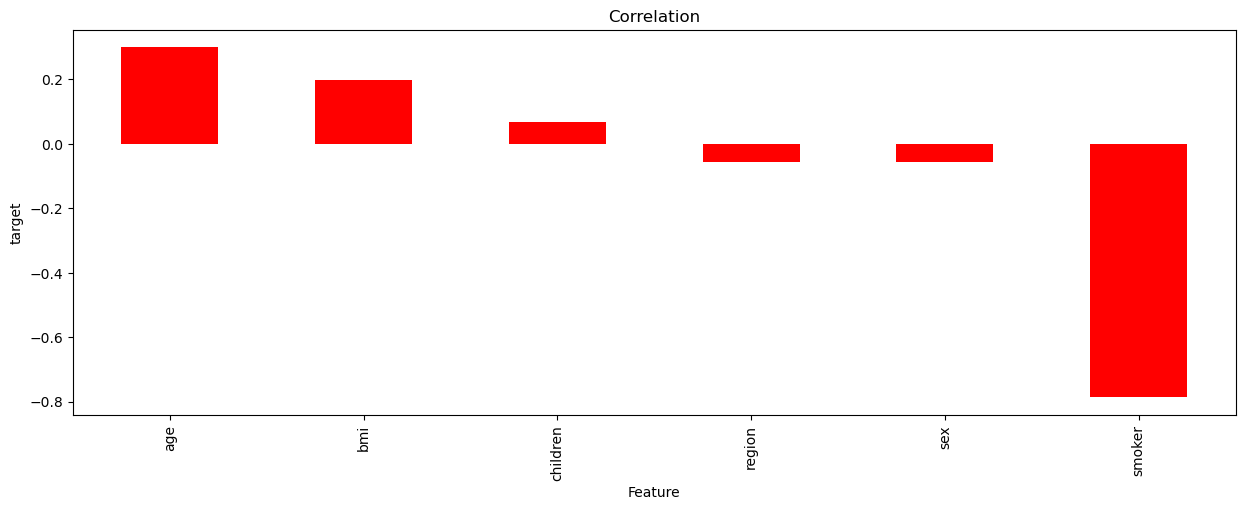

In [59]:
plt.figure(figsize=(15,5))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='red')
plt.title('Correlation')
plt.xlabel('Feature')
plt.ylabel('target')
plt.show()

We observe that smoker has highest negative correlation with charges,age has highest positive correlation with charges.

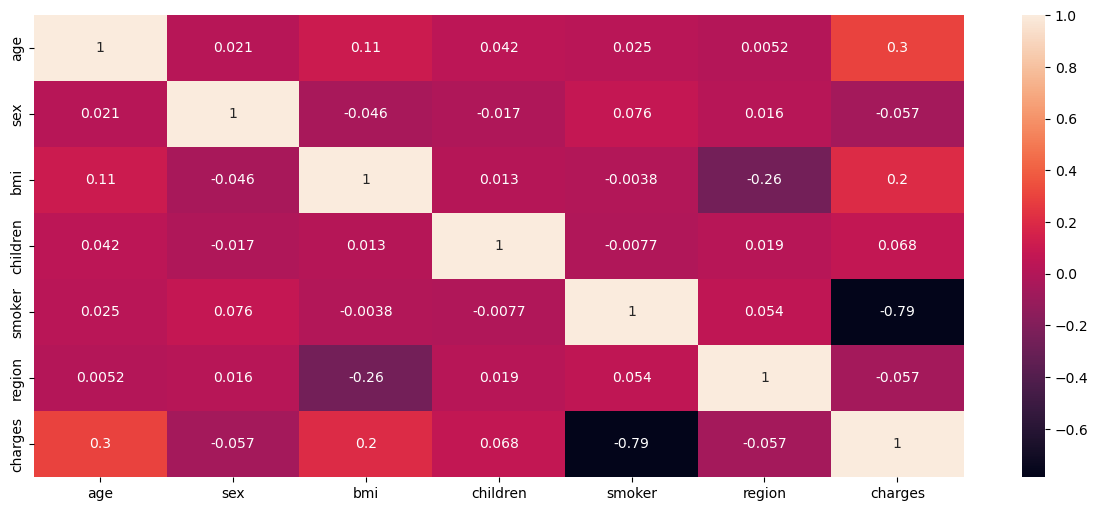

In [60]:
df_corr = df.corr()

plt.figure(figsize = (15,6))
sns.heatmap(df_corr,annot=True,annot_kws ={'size':10})
plt.show()

we observe that 
1. charges with age is positively correlated but not highly correlated.
2. age is having positive corelation with all features and also correlation is better with target variable charges and feature bmi.
3. sex is having positive correlation with region, smoker and age, rest it has negative corelation.
4. bmi is having positive correlation with features like children and age and it has better positive corelation with target.
5. smoker has highest negative corelation with charges.

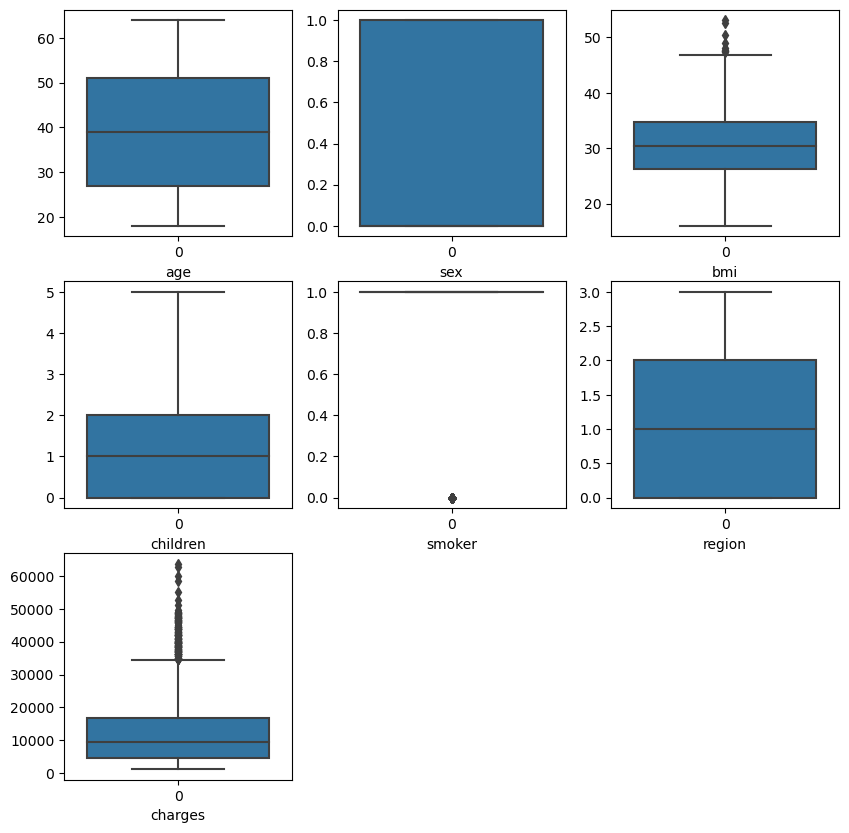

In [61]:
#Next we will plot box plot to check outliers
plt.figure(figsize =(10,10), facecolor = 'white')
num = 1

for column in df:
    if num <=8:
        plt.subplot(3,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
    num +=1
plt.show()


firstly,  the features like sex, children, smoker and region are categorical and target variable is not considered for outliers.
next, if we see for age and bmi features in which age does not have any outlier but bmi has upper outliers.since we have outliers in bmi we check with zscore and iqr methods.

In [62]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,0.403289,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,1.287881,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,1.287881,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,1.365894,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,1.365894,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,1.365894,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,0.481303,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,1.287881,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,0.403289,0.930362


In [63]:
threshold=3
np.where(z>3)
z_df=df[(z<3).all(axis=1)]
z_df.shape

(1309, 7)

In [64]:
print("data_loss =   ", ((df.shape[0]-z_df.shape[0])/df.shape[0])*100)

data_loss =    2.167414050822123


In [65]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]

In [66]:
iqr_df.shape

(1055, 7)

In [67]:
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

data_loss =    21.150971599402094


we check dataloss using zscore and also iqr method where values are 2% and 21% respectively so we consider new dataframe obtained after removing the outliers using z score method.

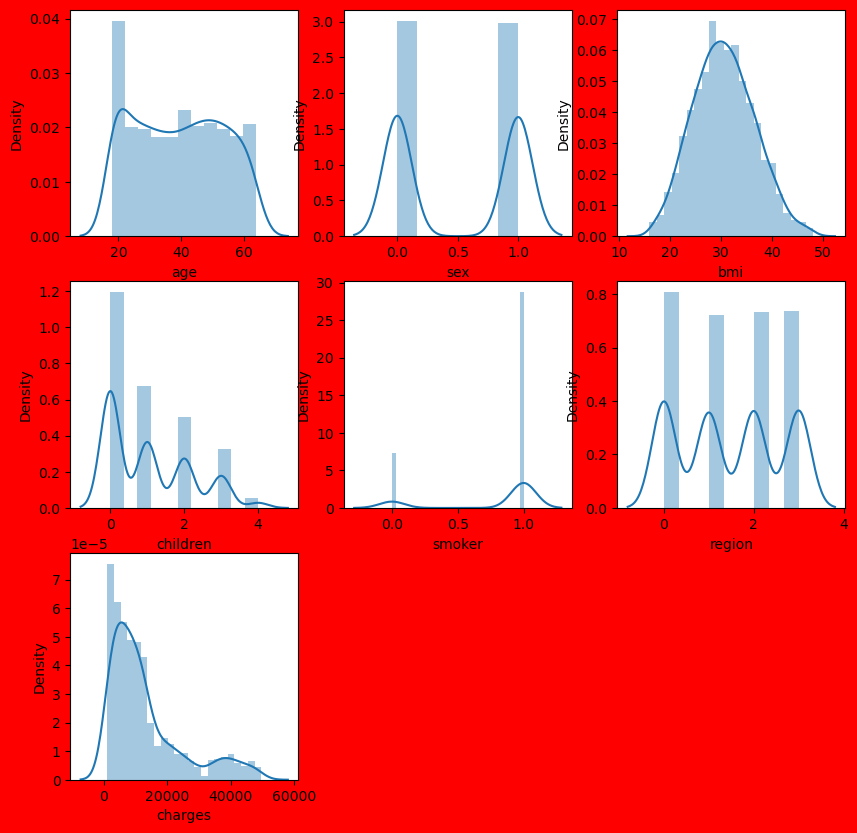

In [68]:
plt.figure(figsize =(10,10), facecolor = 'red')
num = 1
for column in z_df:
    if num <=8:
        ax = plt.subplot(3,3,num)
        sns.distplot(z_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

from the above plot we observe that there is normal distribution in all columns and also we have removed outliers in bmi.

In [69]:
z_df.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker     -1.482731
region      0.033036
charges     1.437160
dtype: float64

we dont see much skewness in any columns except smoker and children. since  they both are categorical column no need to remove skewness.

In [70]:
#after removing outliers and skewness we check the correlation with feature and target
z_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019253,0.118178,0.059100,0.029090,0.004733,0.305263
sex,0.019253,1.000000,-0.042498,-0.014056,0.079058,0.011669,-0.059455
bmi,0.118178,-0.042498,1.000000,0.029916,0.005288,-0.256816,0.191453
children,0.059100,-0.014056,0.029916,1.000000,-0.028844,0.038109,0.100438
smoker,0.029090,0.079058,0.005288,-0.028844,1.000000,0.056988,-0.785129
region,0.004733,0.011669,-0.256816,0.038109,0.056988,1.000000,-0.059916
charges,0.305263,-0.059455,0.191453,0.100438,-0.785129,-0.059916,1.000000


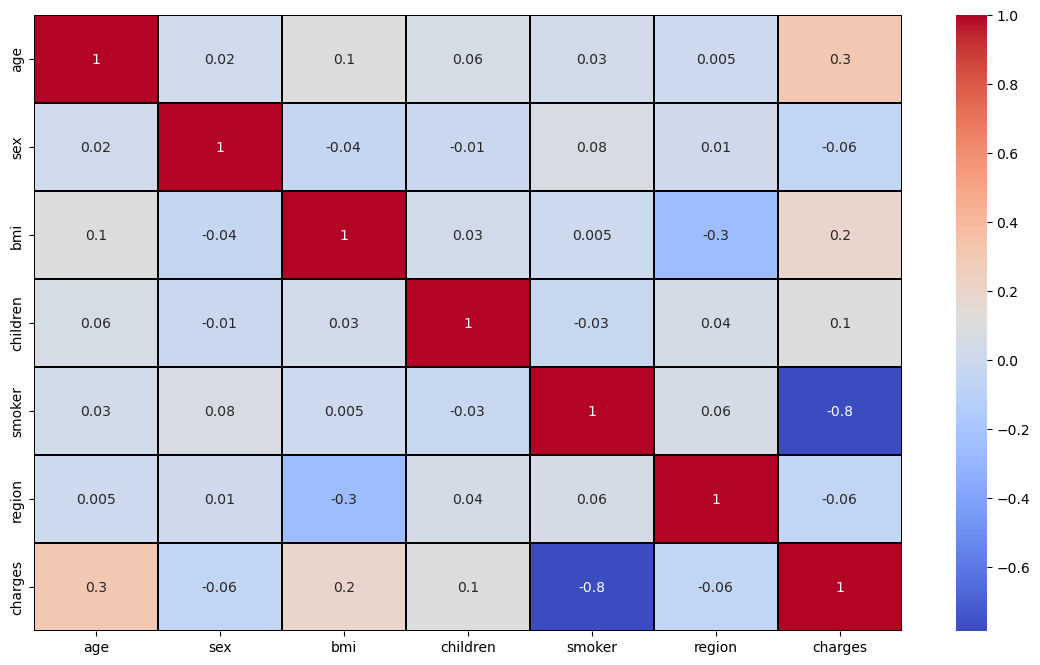

In [71]:
plt.figure(figsize = (14,8))
sns.heatmap(z_df.corr(), linewidths = 0.1,fmt = ".1g", linecolor = "Black", annot=True, cmap = "coolwarm")
plt.show()

we see 
1. there is no correlation between the features and the target.
2. the target column has positive corelation with age, bmi and children column.
3. smoker has high negative correlation with target column.

In [72]:
#separate into features and targets

X = z_df.drop(['charges'], axis = 1)
y = z_df['charges']

In [73]:
X.shape

(1309, 6)

In [74]:
y.shape

(1309,)

### Standardizing the data

In [75]:
#from sklearn.preprocessing import StandardScaler
#sr = StandardScaler()
#X_sr = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
#X_sr

from sklearn.preprocessing import MinMaxScaler
sr = MinMaxScaler()
X_sr = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
X_sr

,age,sex,bmi,children,smoker,region
0,0.021739,1.0,0.371847,0.00,0.0,0.333333
1,0.000000,0.0,0.554656,0.25,1.0,0.000000
2,0.217391,0.0,0.530676,0.75,1.0,0.000000
3,0.326087,0.0,0.210059,0.00,1.0,1.000000
4,0.304348,0.0,0.402367,0.00,1.0,1.000000
...,...,...,...,...,...,...
1304,0.695652,0.0,0.467456,0.75,1.0,1.000000
1305,0.000000,1.0,0.497041,0.00,1.0,0.666667
1306,0.000000,1.0,0.650576,0.00,1.0,0.000000
1307,0.065217,1.0,0.306447,0.00,1.0,0.333333


Since we have very less features we dont go for feature selection methods or removing the features.

### Model Building

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [90]:
accuracy = 0
r_state =0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_sr, y, test_size = 0.25, random_state = i)
    #X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    acc = r2_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("max r2 score is ", accuracy , "randomstate = ",r_state)

max r2 score is  0.8141644575688369 randomstate =  153


In [91]:
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = r_state)
X_train,X_test,y_train,y_test = train_test_split(X_sr, y, test_size = 0.30, random_state = r_state)

In [92]:
X_train.shape

(916, 6)

In [93]:
X_test.shape

(393, 6)

#### Train the Models

In [94]:
lr = LinearRegression()
lr.fit(X_train,y_train)
ls = Lasso()
ls.fit(X_train, y_train)
rg = Ridge()
rg.fit(X_train, y_train)
Rfr = RandomForestRegressor()
Rfr.fit(X_train,y_train)
Gbr = GradientBoostingRegressor()
Gbr.fit(X_train,y_train)
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train,y_train )
Knn =  KNN()
Knn.fit(X_train,y_train)
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [95]:
#Predicting on Test and Training  Data
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
ls_pred = ls.predict(X_test)
ls_pred_train = ls.predict(X_train)
rg_pred = rg.predict(X_test)
rg_pred_train = rg.predict(X_train)
Rfr_pred = Rfr.predict(X_test)
Rfr_pred_train = Rfr.predict(X_train)
Gbr_pred = Gbr.predict(X_test)
Gbr_pred_train = Gbr.predict(X_train)
Dtr_pred = Dtr.predict(X_test)
Dtr_pred_train = Dtr.predict(X_train)
Knn_pred = Knn.predict(X_test)
Knn_pred_train = Knn.predict(X_train)
svr_pred = svr.predict(X_test)
svr_pred_train = svr.predict(X_train)

In [96]:
# Metrics on all models train and test data
#linear
print("Linear Regression Model")
print("r2Score of train data is  ",r2_score(y_train, lr_pred_train))
print("r2Score of test data is  ",r2_score(y_test, lr_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, lr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, lr_pred))
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
print("Root Mean squared error of test data is  ", rmse_lr)
print("\n\n")   
#Lasso
print("Lasso Regression Model")
print("r2Score of train data is  ",r2_score(y_train, ls_pred_train))
print("r2Score of test data is  ",r2_score(y_test, ls_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, ls_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, ls_pred))
rmse_ls = np.sqrt(mean_squared_error(y_test, ls_pred))
print("Root Mean squared error of test data is  ", rmse_ls)
print("\n\n")      
#Ridge
print("Ridge Regression Model")
print("r2Score of train data is  ",r2_score(y_train, rg_pred_train))
print("r2Score of test data is  ",r2_score(y_test, rg_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, rg_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, rg_pred))
rmse_rg = np.sqrt(mean_squared_error(y_test, rg_pred))
print("Root Mean squared error of test data is  ", rmse_rg)
print("\n\n")     
#GradientBoosting
print("GradientBoostingRegression Model")
print("r2Score of train data is  ",r2_score(y_train, Gbr_pred_train))
print("r2Score of test data is  ",r2_score(y_test, Gbr_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, Gbr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, Gbr_pred))
rmse_gbr = np.sqrt(mean_squared_error(y_test, Gbr_pred))
print("Root Mean squared error of test data is  ", rmse_gbr)
print("\n\n")
#RandomForest 
print("RandomForest Regression Model")
print("r2Score of train data is  ",r2_score(y_train, Rfr_pred_train))
print("r2Score of test data is  ",r2_score(y_test, Rfr_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, Rfr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, Rfr_pred))
rmse_rf= np.sqrt(mean_squared_error(y_test, Rfr_pred))
print("Root Mean squared error of test data is  ", rmse_rf)
print("\n\n")
#DecisionTree
print("DecisionTreeRegression Model")
print("r2Score of train data is  ",r2_score(y_train, Dtr_pred_train))
print("r2Score of test data is  ",r2_score(y_test, Dtr_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, Dtr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, Dtr_pred))
rmse_dtr = np.sqrt(mean_squared_error(y_test, Dtr_pred))
print("Root Mean squared error of test data is  ", rmse_dtr)
print("\n\n")     
#Kneighbors
print("KNeighborsRegression Model")
print("r2Score of train data is  ",r2_score(y_train, Knn_pred_train))
print("r2Score of test data is  ",r2_score(y_test, Knn_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, Knn_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, Knn_pred))
rmse_knn = np.sqrt(mean_squared_error(y_test, Knn_pred))
print("Root Mean squared error of test data is  ", rmse_knn)
print("\n\n") 
#Support Vector Regression
print("Support Vector Regression Model")
print("r2Score of train data is  ",r2_score(y_train, svr_pred_train))
print("r2Score of test data is  ",r2_score(y_test, svr_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, svr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, svr_pred))
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_pred))
print("Root Mean squared error of test data is  ", rmse_svr)

Linear Regression Model
r2Score of train data is   0.7230391588478254
r2Score of test data is   0.8056003137590477
Mean absolute error of test data is   4077.5800255893087
Mean squared error of test data is   30597060.107724577
Root Mean squared error of test data is   5531.460937919075



Lasso Regression Model
r2Score of train data is   0.7230385715099841
r2Score of test data is   0.805576619244182
Mean absolute error of test data is   4077.0496686221295
Mean squared error of test data is   30600789.447568625
Root Mean squared error of test data is   5531.798030258211



Ridge Regression Model
r2Score of train data is   0.7229656791041998
r2Score of test data is   0.8046352928358126
Mean absolute error of test data is   4082.601107371103
Mean squared error of test data is   30748947.20057121
Root Mean squared error of test data is   5545.173324664542



GradientBoostingRegression Model
r2Score of train data is   0.8928597188695743
r2Score of test data is   0.8906380244731509
Mean abs

From the above data we observe that gradient boosting has same rsquare score for both training and testing data and very less rmse value from all other models. so we consider gradient boosting model and we will check for the cross validation score then we will tune the parameters

#### Cross_Validation

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
#linear Regression
lr_score = cross_val_score(lr, X_sr, y, cv=5, scoring ='r2')
print(lr_score)
print(np.mean(lr_score))
lr_diff = (r2_score(y_test,lr_pred) - lr_score.mean())*100
print(lr_diff)

[0.76394265 0.71158574 0.78003721 0.72805337 0.76789957]
0.7503037056541191
0.7503037056541191
5.529660810492865


In [102]:
#lasso Regression
ls_score = cross_val_score(ls, X_sr, y, cv=5, scoring ='r2')
print(ls_score)
print(np.mean(ls_score))
ls_diff = (r2_score(y_test,ls_pred) - ls_score.mean())*100
print(ls_diff)

[0.76391766 0.71167481 0.77999655 0.72806559 0.76789644]
0.7503102112251658
5.526640801901617


In [103]:
#Ridge Regression
rg_score = cross_val_score(rg, X_sr, y, cv=5, scoring ='r2')
print(rg_score)
print(np.mean(rg_score))
rg_diff = (r2_score(y_test,rg_pred) - rg_score.mean())*100
print(rg_diff)

[0.76353493 0.71221378 0.77947521 0.72841314 0.76786582]
0.7503005776653201
5.433471517049249


In [104]:
#Gradient Boosting
Gbr_score = cross_val_score(Gbr, X_sr, y, cv=5, scoring ='r2')
print(Gbr_score)
print(np.mean(Gbr_score))
Gbr_diff = (r2_score(y_test,Gbr_pred) - Gbr_score.mean())*100
print(Gbr_diff)

[0.87379767 0.80181974 0.88270543 0.8468078  0.86279876]
0.8535858811811806
3.7052143291970263


In [105]:
#Random Forest
Rfr_score = cross_val_score(Rfr, X_sr, y, cv=5, scoring ='r2')
print(Rfr_score)
print(np.mean(Rfr_score))
Rfr_diff = (r2_score(y_test,Rfr_pred) - Rfr_score.mean())*100
print(Rfr_diff)

[0.85203899 0.78749169 0.85715389 0.82844787 0.8532691 ]
0.8356803102234507
3.30221683687153


In [106]:
#Decision Tree
Dtr_score = cross_val_score(Dtr, X_sr, y, cv=5, scoring ='r2')
print(Dtr_score)
print(np.mean(Dtr_score))
Dtr_diff = (r2_score(y_test,Dtr_pred) - Dtr_score.mean())*100
print(Dtr_diff)

[0.74852531 0.61917359 0.64792487 0.73402592 0.72505857]
0.6949416533611428
5.4872835874096975


In [107]:
#KNeighbors
Knn_score = cross_val_score(Knn, X_sr, y, cv=5, scoring ='r2')
print(Knn_score)
print(np.mean(Knn_score))
Knn_diff = (r2_score(y_test,Knn_pred) - Knn_score.mean())*100
print(Knn_diff)

[0.79763113 0.74657598 0.79590603 0.75455006 0.79096734]
0.7771261068200189
6.184993790751781


In [108]:
#SVR
Svr_score = cross_val_score(svr, X_sr, y, cv=5, scoring ='r2')
print(Svr_score)
print(np.mean(Svr_score))
Svr_diff = (r2_score(y_test,svr_pred) - Svr_score.mean())*100
print(Svr_diff)

[-0.10788368 -0.10806965 -0.06579499 -0.09629633 -0.09860877]
-0.09533068315411057
-0.04307258995330382


#### Hyperparameter Tuning 
#### Gradient Boosting Model using Grid Search CV

In [155]:
from sklearn.model_selection import GridSearchCV

In [169]:
param_grid = {"n_estimators": [10,20,30], "learning_rate" :[0.001,0.01, 0.1], "max_depth":[2,4,6]}

In [170]:
grsr = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)

In [171]:
grsr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]})

In [172]:
grsr.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30}

In [173]:
med = GradientBoostingRegressor(learning_rate = 0.1, max_depth=4, n_estimators=30)

In [174]:
med.fit(X_train,y_train)
y_pred = med.predict(X_test)
print("r2Score of test data is  ",r2_score(y_test, y_pred))
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, y_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean squared error of test data is  ", rmse)

r2Score of test data is   0.893962112725224
Mean absolute error of test data is   2477.2977629522748
Mean squared error of test data is   16689572.25898531
Root Mean squared error of test data is   4085.287292098967


From the above score we find that there is a slight increase in r2 score of  test data after tuning the parameters. so we consider Gradient boosting Regression model as best model and now we save the model and check the prediction for test data.

<b>Before Tuning Parameters</b>

--> r2 score of train data : 89.28%

--> r2 score of test data : 89.02%

<b>After Tuning Parameters</b>

--> r2score of test data : 89.39%

#### Saving the model

In [175]:
import joblib

In [176]:
joblib.dump(med,"medical_insurance_prediction.pkl")

['medical_insurance_prediction.pkl']

In [179]:
#predicting 
model = joblib.load("medical_insurance_prediction.pkl")
result = model.score(X_test,y_test)
print(result)

0.893962112725224


In [186]:
#create dataframe comparing 
comparision = pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=['Predicted','Orignal'])

In [181]:
comparision

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
Predicted,8847.022228,14154.982803,2989.999161,25364.439501,5977.607031,39167.379996,6373.304848,7010.739636,14553.012351,14265.092555,...,13496.993771,6833.044034,12333.764456,14876.594237,43730.318516,3187.543793,7421.307532,12661.035349,4419.921999,10314.720877
Orignal,8847.022228,14154.982803,2989.999161,25364.439501,5977.607031,39167.379996,6373.304848,7010.739636,14553.012351,14265.092555,...,13496.993771,6833.044034,12333.764456,14876.594237,43730.318516,3187.543793,7421.307532,12661.035349,4419.921999,10314.720877


#### Here we find both predicted value and actual values are almost same, so we consider  gradient Boosting regressor model is good and accurate model.